<a href="https://colab.research.google.com/github/prp20/tensorflow_learning/blob/main/MNIST_Handwritten_Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import os, sys
import random
import itertools
import numpy as np


In [3]:
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [22]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 15), text_size=15):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize it
  n_classes = cm.shape[0]  # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)  # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
      labels = classes
  else:
      labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
          xlabel="Predicted label",
          ylabel="True label",
          xticks=np.arange(n_classes),  # create enough axis slots for each class
          yticks=np.arange(n_classes),
          xticklabels=labels,  # axes will labeled with class names (if they exist) or ints
          yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)
  plt.show()

13003
44728
55514
43116
2854
16021
30409
1824
35051
7638
40111
58705
36453
5757
24709
9852
16177
58276
20147
6799


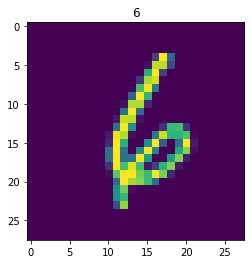

In [4]:
def display_number(img, lbl):
    plt.imshow(img)
    plt.title(lbl)

for i in range(20):
    val = random.randint(0, len(train_labels))
    print(val)
    image = train_data[val]
    display_number(image, train_labels[val])

In [5]:
# Normalise the Data
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [15]:
# Model Building
# set random seed
tf.random.set_seed(42)

# define model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
], name="mnist_model_1")

# compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Define Model Checkpoint Callback
file_path = f"saved_models/{model_1.name}"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=file_path, monitor='val_accuracy', save_best_only=True)

# Fit the model
history_1 = model_1.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels),
                        callbacks=[model_checkpoint])

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0472 - accuracy: 0.6442 - val_loss: 0.7344 - val_accuracy: 0.7569
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6970 - accuracy: 0.7717 - val_loss: 0.6814 - val_accuracy: 0.7860
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6434 - accuracy: 0.8000 - val_loss: 0.6276 - val_accuracy: 0.8119
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6126 - accuracy: 0.8127 - val_loss: 0.6022 - val_accuracy: 0.8223
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5921 - accuracy: 0.8207 - val_loss: 0.5926 - val_accuracy: 0.8231
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5752 - accuracy: 0.8272 - val_loss: 0.5817 - val_accuracy: 0.8277
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5625 - accuracy: 0.8316 - val_loss: 0.5828 - val_accuracy:

In [16]:
# Evaluate the model
model_1.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5230 - accuracy: 0.8520


[0.5229857563972473, 0.8519999980926514]

In [17]:
# Predict Data on test_data_norm
y_preds = model_1.predict(test_data_norm)
tf.argmax(y_preds, axis=1)

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6])>

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, tf.argmax(y_preds, axis=1))
cm

array([[ 893,    9,    3,    0,    7,    5,   15,    2,   31,   15],
       [   1, 1092,   13,    7,    1,    1,    0,    4,   15,    1],
       [  11,   62,  877,   14,   11,    3,   16,    5,   30,    3],
       [   1,   21,   30,  849,    2,   32,    1,   16,   52,    6],
       [  10,    0,    4,    2,  870,    2,   19,   13,    3,   59],
       [  13,    5,    8,   57,   21,  617,    7,    6,  116,   42],
       [  24,    2,   24,    0,   25,   10,  864,    0,    9,    0],
       [   1,   35,    9,    9,    8,    0,    0,  922,    1,   43],
       [  57,   39,   15,   26,    5,   86,   14,    5,  708,   19],
       [  14,    3,    0,   10,   57,   16,    3,   71,    7,  828]])

In [19]:
def plot_loss_curves(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

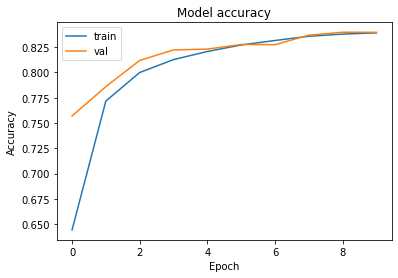

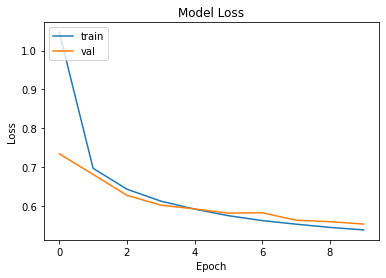

In [14]:
plot_loss_curves(history_1)

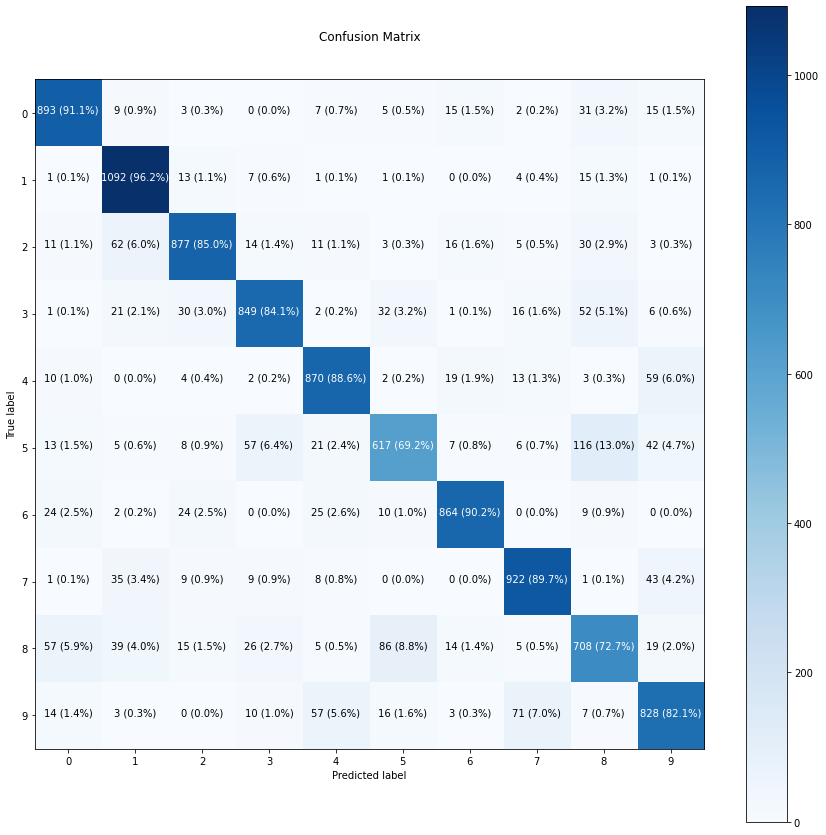

In [24]:
# Make Confusion matrix
make_confusion_matrix(test_labels, tf.argmax(y_preds, axis=1), classes, figsize=(15, 15), text_size=10)

In [25]:
# Model Building with lr = 0.01
# set random seed
tf.random.set_seed(42)

# define model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
], name="mnist_model_2")

# compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Define Model Checkpoint Callback
file_path = f"saved_models/{model_2.name}"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=file_path, monitor='val_accuracy', save_best_only=True)

# Fit the model
history_2 = model_2.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels),
                        callbacks=[model_checkpoint])

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8723 - accuracy: 0.7053 - val_loss: 0.7467 - val_accuracy: 0.7607
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7253 - accuracy: 0.7600 - val_loss: 0.7720 - val_accuracy: 0.7515
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6932 - accuracy: 0.7783 - val_loss: 0.6730 - val_accuracy: 0.8002
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6743 - accuracy: 0.7847 - val_loss: 0.6765 - val_accuracy: 0.7745
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6643 - accuracy: 0.7885 - val_loss: 0.7032 - val_accuracy: 0.7752
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6595 - accuracy: 0.7887 - val_loss: 0.6497 - val_accuracy: 0.7921
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6540 - accuracy: 0.7904 - val_loss: 0.6658 - val_accuracy:

313/313 [==============================] - 1s 3ms/step - loss: 0.6328 - accuracy: 0.8030


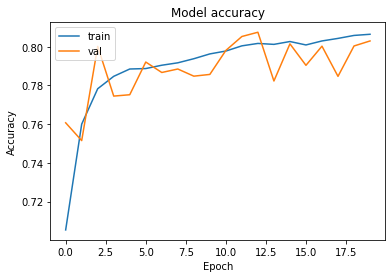

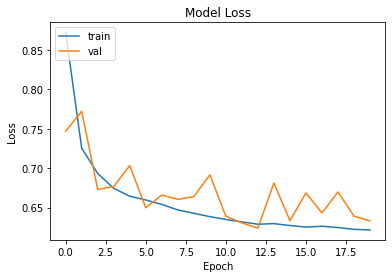

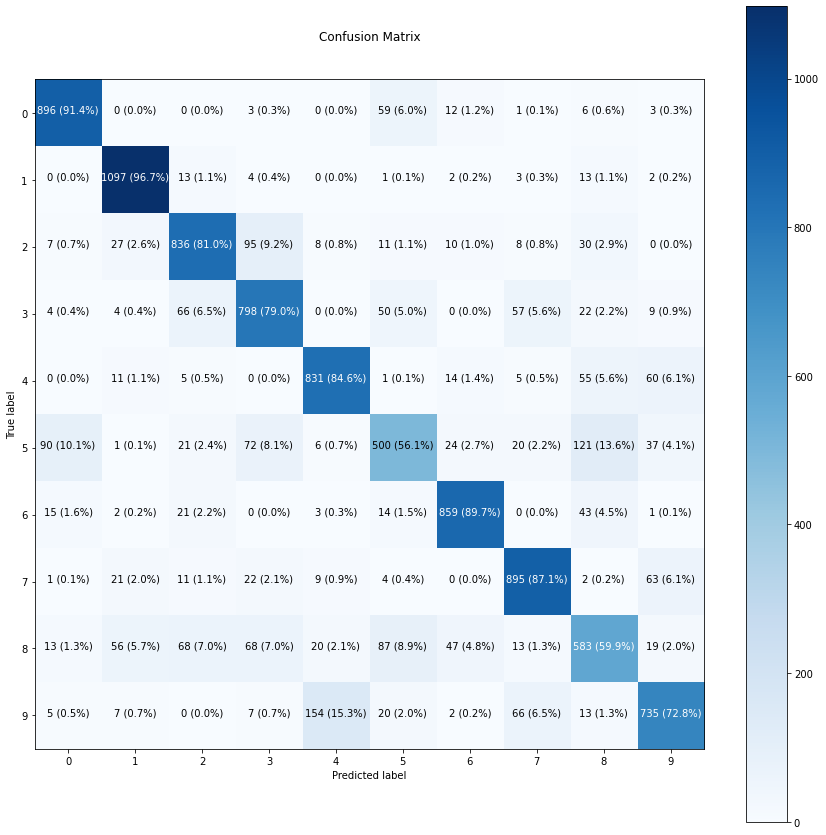

In [26]:
# Evaluate the model
model_2.evaluate(test_data_norm, test_labels)

# Predict Data on test_data_norm
y_preds_new = model_2.predict(test_data_norm)
y_preds_new = tf.argmax(y_preds_new, axis=1)

# Plot loss vs accuracy curves
plot_loss_curves(history_2)

# plot confusion matrix
make_confusion_matrix(test_labels, y_preds_new, classes, (15, 15), 10)

In [30]:
# Model Building with adding more hidden units
# set random seed
tf.random.set_seed(42)

# define model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
], name="mnist_model_2")

# compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Define Model Checkpoint Callback
file_path = f"saved_models/{model_3.name}"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=file_path, monitor='val_accuracy', save_best_only=True)

# Fit the model
history_3 = model_3.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels),
                        callbacks=[model_checkpoint])

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5723 - accuracy: 0.8271 - val_loss: 0.3173 - val_accuracy: 0.9049
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2957 - accuracy: 0.9148 - val_loss: 0.2733 - val_accuracy: 0.9219
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2634 - accuracy: 0.9251 - val_loss: 0.2522 - val_accuracy: 0.9268
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2455 - accuracy: 0.9299 - val_loss: 0.2494 - val_accuracy: 0.9276
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2339 - accuracy: 0.9338 - val_loss: 0.2500 - val_accuracy: 0.9295
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2245 - accuracy: 0.9357 - val_loss: 0.2299 - val_accuracy: 0.9339
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2168 - accuracy: 0.9377 - val_loss: 0.2320 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 0.2053 - accuracy: 0.9412


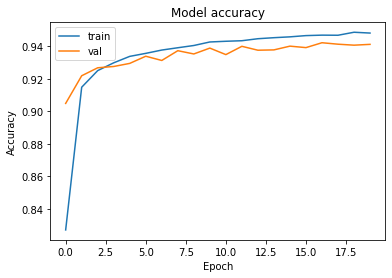

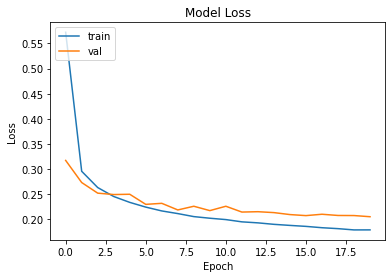

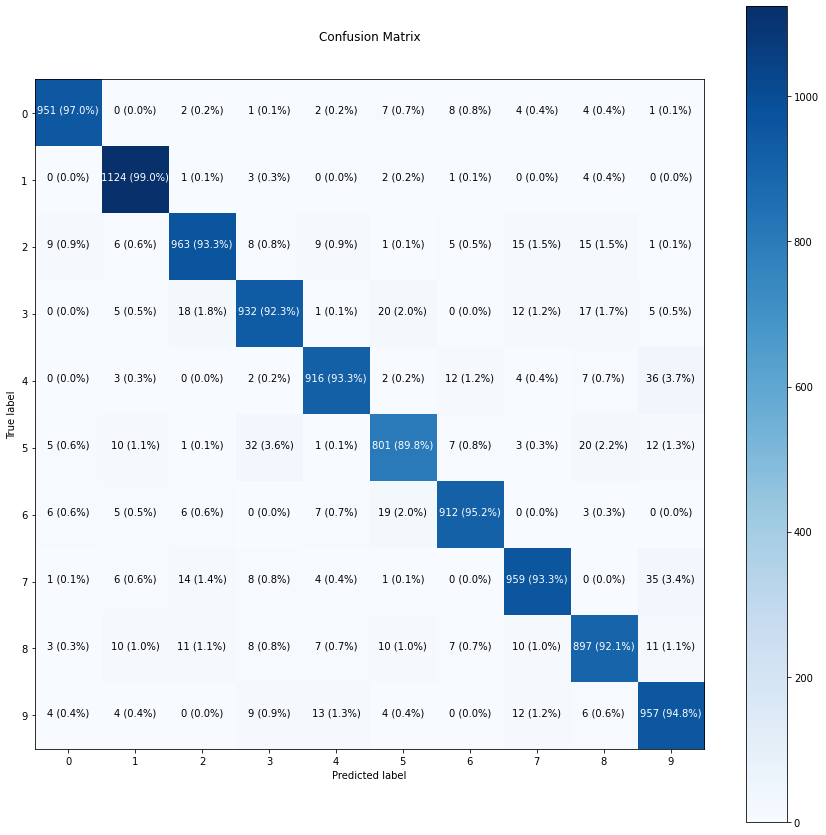

In [33]:
# Evaluate the model
model_3.evaluate(test_data_norm, test_labels)

# Predict Data on test_data_norm
y_preds_new = model_3.predict(test_data_norm)
y_preds_new = tf.argmax(y_preds_new, axis=1)

# Plot loss vs accuracy curves
plot_loss_curves(history_3)

# plot confusion matrix
make_confusion_matrix(test_labels, y_preds_new, classes, (15, 15), 10)